In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('datasets/movies.csv')
ratings = pd.read_csv('datasets/ratings.csv')

In [4]:
cb_movies = pd.read_csv('datasets/tmdb_5000_movies.csv')

In [5]:
cb_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
movies.shape

(62423, 3)

In [6]:
ratings.shape

(25000095, 4)

In [7]:
ratings.groupby('userId')['rating'].count().sort_values(ascending=False)

userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
12094        20
119539       20
156759       20
12084        20
36207        20
Name: rating, Length: 162541, dtype: int64

In [8]:
num_ratings = ratings.groupby('userId')['rating'].count().reset_index()

In [9]:
num_ratings.rename(columns={'rating': 'num_user_ratings'}, inplace=True)

In [10]:
ratings = ratings.merge(num_ratings, on='userId')

In [11]:
ratings.head()

,userId,movieId,rating,timestamp,num_user_ratings
0,1,296,5.0,1147880044,70
1,1,306,3.5,1147868817,70
2,1,307,5.0,1147868828,70
3,1,665,5.0,1147878820,70
4,1,899,3.5,1147868510,70


<Axes: >

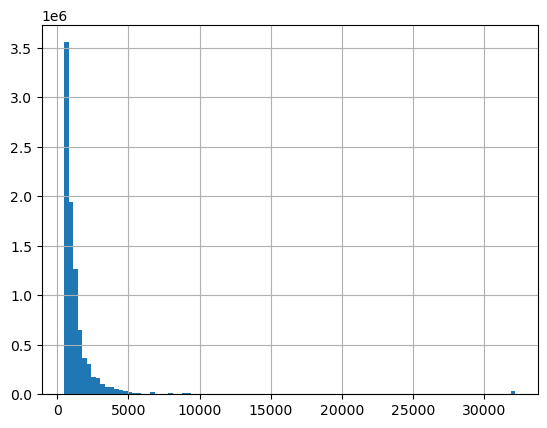

In [12]:
cond = ratings['num_user_ratings']>500
ratings[cond]['num_user_ratings'].hist(bins=100)

In [13]:
final_ratings = ratings[ratings['num_user_ratings']>500]
final_ratings.shape

(8935061, 5)

In [14]:
movie_ratings = final_ratings.groupby('movieId')['rating'].count().reset_index()
movie_ratings.rename(columns={'rating': 'num_movie_ratings'}, inplace=True)

In [15]:
movie_ratings.sort_values(by='num_movie_ratings')

,movieId,num_movie_ratings
57584,209163,1
45604,178709,1
45603,178707,1
45601,178703,1
30159,139225,1
...,...,...
257,260,8554
1237,1270,8562
292,296,8683
351,356,8889


In [16]:
final_ratings = final_ratings.merge(movie_ratings, on='movieId')

In [17]:
final_ratings

,userId,movieId,rating,timestamp,num_user_ratings,num_movie_ratings
0,3,1,4.0,1439472215,656,8078
1,12,1,4.0,1167582601,736,8078
2,120,1,5.0,956264593,640,8078
3,166,1,4.0,942014736,611,8078
4,171,1,4.5,1074594380,671,8078
...,...,...,...,...,...,...
8935056,162358,200194,2.0,1553453843,837,1
8935057,162386,139970,3.5,1549215965,561,1
8935058,162386,198087,4.0,1548419198,561,1
8935059,162386,200726,4.0,1554651417,561,1


<Axes: >

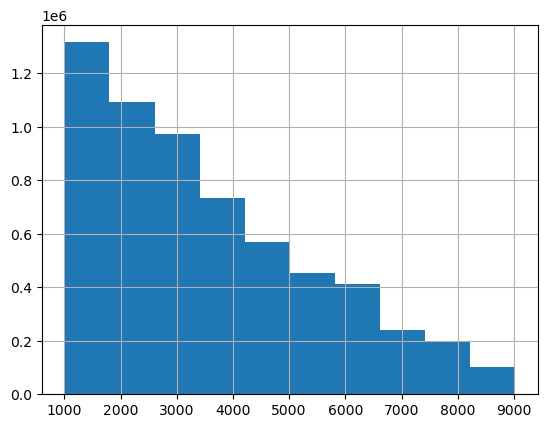

In [18]:
cond = final_ratings['num_movie_ratings'] > 1000
final_ratings[cond]['num_movie_ratings'].hist()

In [19]:
final_ratings = final_ratings[final_ratings['num_movie_ratings']>500]
final_ratings.shape

(7215412, 6)

In [20]:
movies['year'] = movies['title'].apply(lambda x: x[x.find('(')+1:x.rfind(')')] if '(' in x else x)
movies['genres'] = movies['genres'].str.split('|')

In [21]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II (1995),[Comedy],1995


In [22]:
movies.shape

(62423, 4)

In [23]:
condition = final_ratings['movieId'].tolist()
movies = movies[movies['movieId'].isin(condition)]

In [24]:
movies.shape

(3950, 4)

In [25]:
final_ratings = final_ratings.merge(movies[['movieId', 'title']], on='movieId')

In [26]:
final_ratings.shape

(7215412, 7)

In [27]:
movies_pivot = pd.pivot_table(data=final_ratings, index='title', columns='userId', values='rating', fill_value=0)

In [28]:
movies_pivot.head()

userId,3,12,72,80,120,166,171,175,181,187,...,162386,162387,162394,162445,162481,162484,162495,162508,162516,162519
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0
(500) Days of Summer (2009),0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,4.5,0.0,2.0,0.0,0.0,0.0,0.0,2.5,4.0,0.0
*batteries not included (1987),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,0.0,3.5,0.0,3.0,0.0
...And Justice for All (1979),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,4.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0


In [29]:
movies_pivot.shape

(3950, 9663)

In [30]:
# pivot table have zeros, and it will be a problem for k-neighbors algoritm, because 
# this algorithm calculate distances and we should not consider zeros. 
# To do this we are using csr_matrix - Compressed Sparse Row matrix
# a sparse matrix is a matrix in which most of the elements are zero.

In [31]:
from scipy.sparse import csr_matrix

In [32]:
movies_sparse = csr_matrix(movies_pivot)

In [33]:
movies_sparse

<3950x9663 sparse matrix of type '<class 'numpy.float64'>'
	with 7215412 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
model = NearestNeighbors(algorithm='auto')

In [36]:
model.fit(movies_sparse)

NearestNeighbors()

In [37]:
np.where(movies_pivot.index == 'Avengers: Infinity War (2018)')

(array([], dtype=int64),)

In [38]:
# reshaping data into a 2D array for kneighbors algorithm.
distance, suggestion = model.kneighbors(movies_pivot.iloc[154, :].values.reshape(1, -1), n_neighbors=10)

In [39]:
distance

array([[  0.        , 113.28393531, 115.45778449, 116.714395  ,
        117.14947716, 117.1825499 , 117.30622319, 117.36162064,
        117.85478353, 118.087891  ]])

In [40]:
suggestion

array([[ 154, 3219,  280,  806, 3864,  260,  950,  191, 3402,  489]],
      dtype=int64)

In [41]:
for i in suggestion:
    print(movies_pivot.index[i])

Index(['America's Sweethearts (2001)', 'Someone Like You (2001)',
       'Bachelor, The (1999)', 'Crossroads (2002)',
       'Win a Date with Tad Hamilton! (2004)', 'Autumn in New York (2000)',
       'Divine Secrets of the Ya-Ya Sisterhood (2002)', 'Angel Eyes (2001)',
       'Sweetest Thing, The (2002)', 'Bounce (2000)'],
      dtype='object', name='title')


In [42]:
movies_names = movies_pivot.index

In [43]:
print(movies_names)

Index([''burbs, The (1989)', '(500) Days of Summer (2009)',
       '*batteries not included (1987)', '...And Justice for All (1979)',
       '10 Cloverfield Lane (2016)', '10 Things I Hate About You (1999)',
       '10,000 BC (2008)', '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '102 Dalmatians (2000)',
       ...
       'Zodiac (2007)', 'Zombieland (2009)', 'Zoolander (2001)',
       'Zootopia (2016)', 'Zulu (1964)', '[REC] (2007)', 'eXistenZ (1999)',
       'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)'],
      dtype='object', name='title', length=3950)


In [44]:
import pickle
pickle.dump(model, open('files/model.pkl', 'wb'))
pickle.dump(movies_names, open('files/movies_names.pkl', 'wb'))
pickle.dump(movies_pivot, open('files/movies_pivot.pkl', 'wb'))
pickle.dump(movies[['title', 'genres']], open('files/movies_df.pkl', 'wb'))